In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas_datareader.data as web
import datetime as dt
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller

In [22]:
start_time, end_time = dt.datetime(2016,1,1), dt.datetime(2017,4,1)
TOPIX_df = web.DataReader("INDEXTOPIX:TOPIX", 'google', start, end)['Close'].rename(columns={'Close': 'P(t)'})
TOPIX_price_df = pd.concat([TOPIX_df, TOPIX_df.shift(1)], axis = 1).rename(columns={0:'P(t)', 1: 'P(t-1)'})[1:]
TOPIX_price_df['price_return'] = TOPIX_price_df['P(t)'] / TOPIX_price_df['P(t-1)'] - 1
TOPIX_price_df[:2]

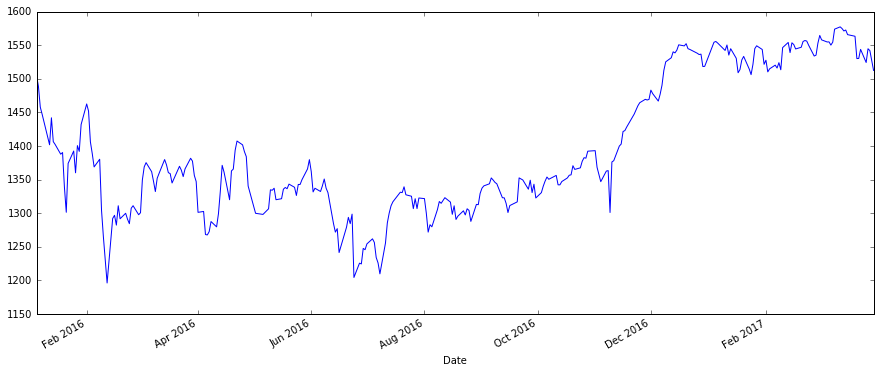

In [40]:
plt.figure(figsize=(15, 6))
TOPIX_price_df['P(t)'].plot()
plt.show()

# Ljung–Box test
Reference: https://en.wikipedia.org/wiki/Ljung%E2%80%93Box_test

The Ljung–Box test (named for Greta M. Ljung and George E. P. Box) is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero.

## The Ljung–Box test may be defined as
- H0: The data are **independently distributed** (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process).
- Ha: The data are **not independently distributed**; they **exhibit serial correlation**.

## Statistics

\begin{equation}
Q = n\left(n+2\right)\sum_{k=1}^h\frac{\hat{\rho}^2_k}{n-k}
\end{equation}

For significance level $\alpha$, the critical region for rejection of the hypothesis of randomness is

\begin{equation}
Q > \chi_{1-\alpha,h}^2
\end{equation}


In [42]:
def test_ljungbox(price_df, lag): _, pvalue = acorr_ljungbox(price_df['price_return'], lags=lag); print("P-value = %s on lag = %s"%(pvalue, lag) )
test_ljungbox(TOPIX_price_df, 1)
test_ljungbox(TOPIX_price_df, 2)
test_ljungbox(TOPIX_price_df, 3)

P-value = [ 0.31528089] on lag = 1
P-value = [ 0.31528089  0.57674997] on lag = 2
P-value = [ 0.31528089  0.57674997  0.4448136 ] on lag = 3


# Dickey-Fuller test
Reference: https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test

the Dickey–Fuller test tests the null hypothesis of whether a unit root is present in an autoregressive model.


### 単位根の存在を確かめる検定
1. 統計量、もしくはディッキー–フラー検定（DF検定）
2. 根が1以上であるかの有意性検定（F検定）
3. フィリップス–ペロン検定（PP検定）
4. Dickey–Pantula 検定




In [44]:
_, p_value, _, _, _, _ = adfuller(TOPIX_price_df['price_return']); print(p_value)

2.19916281361e-30


p valueは、有意水準1%のもとで、帰無仮説は棄却される。従って、TOPIXの収益率は、単位根を有していない。


** 発散する動きに見えないため、収益率は定常性を満たしている **

と本文では表現していた。ホント？